In [143]:
#In this challenge, you are tasked with helping a small, rural town modernize its vote-counting process. (Up until now, Uncle Cleetus had been trustfully tallying them one-by-one, but unfortunately, his concentration isn't what it used to be.)

#You will be give a set of poll data called [election_data.csv](PyPoll/Resources/election_data.csv). The dataset is composed of three columns: `Voter ID`, `County`, and `Candidate`. Your task is to create a Python script that analyzes the votes and calculates each of the following:

  #The total number of votes cast

  #A complete list of candidates who received votes

  #The percentage of votes each candidate won

  #The total number of votes each candidate won

  #The winner of the election based on popular vote.

  #As an example, your analysis should look similar to the one below:

 # ```text
 # Election Results
 # -------------------------
 # Total Votes: 3521001
#  -------------------------
#  Khan: 63.000% (2218231)
#  Correy: 20.000% (704200)
#  Li: 14.000% (492940)
#  O'Tooley: 3.000% (105630)
#  -------------------------
#  Winner: Khan
#  -------------------------

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
election_df = pd.read_csv("election_data.csv")
election_df.head()

,Voter ID,County,Candidate
0,12864552,Marsh,Khan
1,17444633,Marsh,Correy
2,19330107,Marsh,Khan
3,19865775,Queen,Khan
4,11927875,Marsh,Khan


In [146]:
election_df.dtypes

Voter ID      int64
County       object
Candidate    object
dtype: object

In [147]:
print(election_df.Candidate.unique())

['Khan' 'Correy' 'Li' "O'Tooley"]


In [161]:
print(election_df.groupby('Candidate')['Voter ID'].value_counts())

Candidate  Voter ID
Correy     10000009    1
           10000013    1
           10000019    1
           10000035    1
           10000043    1
           10000046    1
           10000084    1
           10000087    1
           10000091    1
           10000152    1
           10000174    1
           10000193    1
           10000207    1
           10000214    1
           10000217    1
           10000225    1
           10000229    1
           10000247    1
           10000260    1
           10000288    1
           10000311    1
           10000348    1
           10000360    1
           10000377    1
           10000379    1
           10000395    1
           10000406    1
           10000416    1
           10000440    1
           10000441    1
                      ..
O'Tooley   19996955    1
           19996962    1
           19997157    1
           19997317    1
           19997380    1
           19997470    1
           19997621    1
           19997653    1
     

In [149]:
election_df.dtypes

Voter ID      int64
County       object
Candidate    object
dtype: object

In [150]:
election_df.groupby('Candidate').count()

,Voter ID,County
Candidate,,
Correy,704200,704200
Khan,2218231,2218231
Li,492940,492940
O'Tooley,105630,105630


In [151]:
election_count = election_df.groupby('Candidate').count()
election_count


,Voter ID,County
Candidate,,
Correy,704200,704200
Khan,2218231,2218231
Li,492940,492940
O'Tooley,105630,105630


In [152]:
election_count.sum

<bound method DataFrame.sum of            Voter ID   County
Candidate                   
Correy       704200   704200
Khan        2218231  2218231
Li           492940   492940
O'Tooley     105630   105630>

In [153]:
election_count['Cumulative_Votes'] = election_count['Voter ID'].cumsum()
print(election_count)

           Voter ID   County  Cumulative_Votes
Candidate                                     
Correy       704200   704200            704200
Khan        2218231  2218231           2922431
Li           492940   492940           3415371
O'Tooley     105630   105630           3521001


In [154]:
election_count['Percentage'] = election_count['Voter ID']/election_count['Voter ID'].sum()
election_count

,Voter ID,County,Cumulative_Votes,Percentage
Candidate,,,,
Correy,704200,704200,704200,0.20
Khan,2218231,2218231,2922431,0.63
Li,492940,492940,3415371,0.14
O'Tooley,105630,105630,3521001,0.03


In [155]:
election_count['Voter Percentile Rank']=election_count['Percentage'].rank(pct=True)
print(election_count)

           Voter ID   County  Cumulative_Votes  Percentage  \
Candidate                                                    
Correy       704200   704200            704200        0.20   
Khan        2218231  2218231           2922431        0.63   
Li           492940   492940           3415371        0.14   
O'Tooley     105630   105630           3521001        0.03   

           Voter Percentile Rank  
Candidate                         
Correy                      0.75  
Khan                        1.00  
Li                          0.50  
O'Tooley                    0.25  


In [156]:
election_count['Cumulative_Percentage'] = election_count['Percentage'].cumsum()
print(election_count)

           Voter ID   County  Cumulative_Votes  Percentage  \
Candidate                                                    
Correy       704200   704200            704200        0.20   
Khan        2218231  2218231           2922431        0.63   
Li           492940   492940           3415371        0.14   
O'Tooley     105630   105630           3521001        0.03   

           Voter Percentile Rank  Cumulative_Percentage  
Candidate                                                
Correy                      0.75                   0.20  
Khan                        1.00                   0.83  
Li                          0.50                   0.97  
O'Tooley                    0.25                   1.00  


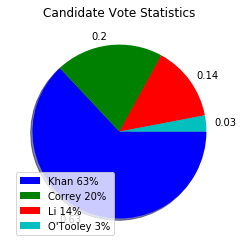

In [172]:
values = [.63, .20, .14, .03]
colors = ['b', 'g', 'r', 'c']
explode = (0, 0, 0, 0)
labels = ["Khan 63%", "Correy 20%", "Li 14%", "O'Tooley 3%"]
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Candidate Vote Statistics')
plt.legend(labels,loc=3)
plt.show()

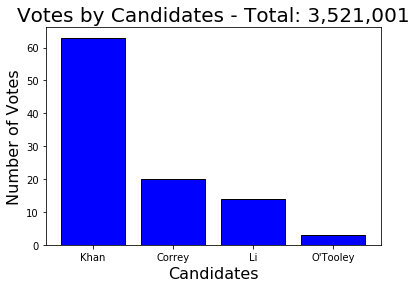

In [181]:
candidate=["Khan","Correy","Li","O'Tooley"]
pos = np.arange(len(candidate))
votes=[63,20,14,3]
 
plt.bar(pos,votes,color='blue',edgecolor='black')
plt.xticks(pos, candidates)
plt.xlabel('Candidates', fontsize=16)
plt.ylabel('Number of Votes', fontsize=16)
plt.title('Votes by Candidates - Total: 3,521,001',fontsize=20)
plt.show()

In [157]:
print("""
 Election Results
-------------------------
  Total Votes: 3521001
-------------------------
  Khan: 63% (2218231)
  Correy: 20% (704200)
  Li: 14% (492940)
  O'Tooley: 3.0% (105630)
  -------------------------
  Winner: Khan
-------------------------""")


 Election Results
-------------------------
  Total Votes: 3521001
-------------------------
  Khan: 63% (2218231)
  Correy: 20% (704200)
  Li: 14% (492940)
  O'Tooley: 3.0% (105630)
  -------------------------
  Winner: Khan
-------------------------


In [158]:
def results():
    return """
    Election Results
-------------------------
  
-------------------------
  Khan: 63% (2218231)
  Correy: 20% (704200)
  Li: 14% (492940)
  O'Tooley: 3.0% (105630)
  -------------------------
  Winner: Khan
-------------------------"""

output = results()
file = open("Election_Results.txt","w")
file.write(output)
file.close()

In [159]:
print(election_count)

           Voter ID   County  Cumulative_Votes  Percentage  \
Candidate                                                    
Correy       704200   704200            704200        0.20   
Khan        2218231  2218231           2922431        0.63   
Li           492940   492940           3415371        0.14   
O'Tooley     105630   105630           3521001        0.03   

           Voter Percentile Rank  Cumulative_Percentage  
Candidate                                                
Correy                      0.75                   0.20  
Khan                        1.00                   0.83  
Li                          0.50                   0.97  
O'Tooley                    0.25                   1.00  


In [160]:
election_count['Voter ID'].sum()

3521001